In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from itertools import chain 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model

In [6]:
def test_cv(learner, X, y, k=5):
    N = len(y)
    first = N % k
    first_n = int(N / k) + 1
    n = int(N / k)

    # print(N, first, first_n, n)

    shape = X.shape
    shuffle = np.zeros((shape[0], shape[1] + 1))
    shuffle[:, :-1] = X
    shuffle[:, -1] = y

    # np.random.shuffle(shuffle)
    per = np.random.permutation(N)

    pred = np.zeros([N, 1])

    for i in range(0, k):
        if i < first:
            from_i = i * first_n
            to_i = (i + 1) * first_n
            # print(i * first_n, (i + 1) * first_n)
        else:
            from_i = (first * first_n) + (i - first) * n
            to_i = (first * first_n) + (i - first + 1) * n
            # print((first * first_n) + (i - first) * n, (first * first_n) + (i - first + 1) * n)

        Xi_train = np.delete(shuffle, np.s_[per[from_i:to_i]], 0)
        Xi_test = shuffle[per[from_i:to_i]]

        c = learner.fit(Xi_train[:, :-1], Xi_train[:, -1])
        
        pred[per[from_i:to_i]] = np.array(c.predict(Xi_test[:, :-1])).reshape(len(pred[per[from_i:to_i]]), 1)
        RRMSE_max_hr = 1 - r2_score(y[per[from_i:to_i]], pred[per[from_i:to_i]])
        print(RRMSE_max_hr)

    return pred

### Import data

In [17]:
df = pd.read_csv("data/all_normalized.csv")
df.head()

X_all = df.drop(['max_hr', 'vo2_l_min', 'vo2_ml_kg_min', 'Unnamed: 0'], axis=1)
y_hr = df['max_hr']
y_vo2 = df['vo2_ml_kg_min']

In [18]:
X_all.head()

,Smoked,PhysInactive,Aritmia,ageattest,height inch->cm,weight Ib->kg,BMI,waist,bodyfat,AnyMeds AN do AY,...,test_termination_reason_2.0,test_termination_reason_3.0,test_termination_reason_4.0,test_termination_reason_5.0,test_termination_reason_6.0,test_termination_reason_7.0,test_termination_reason_8.0,TestIndication_2.0,TestIndication_3.0,TestIndication_4.0
0,0.0,1.0,0.0,0.322812,0.666821,0.268406,0.218599,0.333921,0.150895,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.509326,0.254439,0.291403,0.455874,0.385551,0.300159,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.609756,0.208275,0.216546,0.393582,0.385551,0.537049,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.236729,0.450980,0.183053,0.227900,0.385551,0.300159,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.552367,0.647059,0.237614,0.198994,0.409780,0.259484,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## vo2_ml_kg_min

BMI                       --> 0.049899

ve_btbs                   --> 0.051857

weight Ib->kg             --> 0.053830

resting_dbp               --> 0.054944

peak_sbp                  --> 0.056452

resting_sbp               --> 0.062129

height inch->cm           --> 0.065005

resting_hr                --> 0.067020

ageattest                 --> 0.081574

max_rer                   --> 0.097260


In [20]:
X_vo2_3 = ['max_rer', 'ageattest', 'resting_hr']
X_vo2_4 = ['max_rer', 'ageattest', 'resting_hr', 'height inch->cm']
X_vo2_5 = ['max_rer', 'ageattest', 'resting_hr','height inch->cm', 'resting_sbp']
X_vo2_10 = ['max_rer', 'ageattest', 'resting_hr', 'height inch->cm',
           'resting_sbp', 'peak_sbp', 'resting_dbp', 'weight Ib->kg',
           've_btbs', 'BMI']

## hr_max top 10 features

BMI                       --> 0.052423

ve_btbs                   --> 0.053262

resting_dbp               --> 0.055141

weight Ib->kg             --> 0.055683

peak_sbp                  --> 0.056179

resting_sbp               --> 0.061111

resting_hr                --> 0.066919

height inch->cm           --> 0.068099

ageattest                 --> 0.079759

max_rer                   --> 0.094420


In [21]:
X_hr_3 = ['max_rer', 'ageattest', 'height inch->cm']
X_hr_4 = ['max_rer', 'ageattest', 'height inch->cm', 'resting_hr']
X_hr_5 = ['max_rer', 'ageattest', 'height inch->cm', 'resting_hr', 'resting_sbp']
X_hr_10 = ['max_rer', 'ageattest', 'height inch->cm', 'resting_hr', 
           'resting_sbp', 'peak_sbp', 'weight Ib->kg', 'resting_dbp',
           've_btbs', 'BMI']

## MODELS

### Lasso

In [66]:
X = X_all # [X_hr_10]
X.head()

,Smoked,PhysInactive,Aritmia,ageattest,height inch->cm,weight Ib->kg,BMI,waist,bodyfat,AnyMeds AN do AY,...,test_termination_reason_2.0,test_termination_reason_3.0,test_termination_reason_4.0,test_termination_reason_5.0,test_termination_reason_6.0,test_termination_reason_7.0,test_termination_reason_8.0,TestIndication_2.0,TestIndication_3.0,TestIndication_4.0
0,0.0,1.0,0.0,0.322812,0.666821,0.268406,0.218599,0.333921,0.150895,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.509326,0.254439,0.291403,0.455874,0.385551,0.300159,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.609756,0.208275,0.216546,0.393582,0.385551,0.537049,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.236729,0.450980,0.183053,0.227900,0.385551,0.300159,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.552367,0.647059,0.237614,0.198994,0.409780,0.259484,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


0.38162129346879325
0.3956151537725032
0.406120830046763
0.400690655019758
0.43133418969087134
0.4170266805659726
0.3963323314469235
0.4250634617799883
0.4052050618652191
0.4409600132256908
------------------------------
OVERALL RRMSE
0.40940068828879395
OVERALL RMSE
13.036707031694776


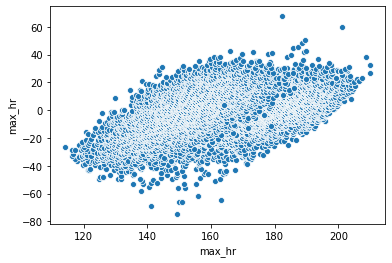

In [61]:
clf = Lasso(alpha=0.1)

res_lasso = test_cv(clf, X, y_hr, k=10)
RRMSE_max_hr = 1 - r2_score(y_hr, res_lasso)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE_max_hr)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y_hr, res_lasso)))

y_res = list(chain.from_iterable(res_lasso))

# BLAND-ALTMAN plot
sns.scatterplot(x=((y_hr + y_res) / 2), y=(y_hr - y_res))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hr, test_size=0.3, random_state=420)
reg = clf.fit(X_train, y_train)
reg.coef_

fs = {X.columns[reg.coef_ != 0][i]: reg.coef_[reg.coef_ != 0][i] for i in range(len(X.columns[reg.coef_ != 0]))}
fs = {k: v for k, v in sorted(fs.items(), key=lambda item: item[1])}

pd.DataFrame.from_dict(fs, orient='index', columns=['weights'])

,weights
ageattest,-43.063965
weight Ib->kg,-5.677705
ethnic_code_1.0,-2.940235
Smoked,-2.874035
metabolic_system_6.0,-2.467463
Hypertension,-1.478216
ModeCode,-1.415812
CR_Code_1.0,-1.346996
BMI,-0.987624
AnyMeds AN do AY,-0.565582


In [63]:
y_pred = reg.predict(X_test)
RRMSE_max_hr = 1 - r2_score(y_test, y_pred)
print(RRMSE_max_hr)

0.4108830949990212


### Random Forests

In [121]:
X = X_all[X_hr_10[1:8]]
X.head()

,ageattest,height inch->cm,resting_hr,resting_sbp,peak_sbp,weight Ib->kg,resting_dbp
0,0.322812,0.666821,0.318182,0.381818,0.449891,0.268406,0.525000
1,0.509326,0.254439,0.456250,0.380273,0.456522,0.291403,0.484375
2,0.609756,0.208275,0.456250,0.380273,0.347826,0.216546,0.484375
3,0.236729,0.450980,0.704545,0.380273,0.449891,0.183053,0.484375
4,0.552367,0.647059,0.409091,0.345455,0.449891,0.237614,0.425000


0.5237204551181496
0.5279061004173082
0.5176806967486787
0.5260619998177457
0.5263729999070351
0.5729969112474294
0.49049137084669314
0.5434498918393573
0.5232125529581643
0.48945678525422753
------------------------------
OVERALL RRMSE
0.5237081009032346
OVERALL RMSE
14.744779000015933


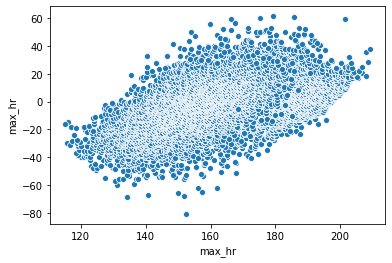

In [122]:
regr = RandomForestRegressor(n_estimators=250, max_depth=10, random_state=0)
res_rf = test_cv(regr, X, y_hr, k=10)
RRMSE_max_hr = 1 - r2_score(y_hr, res_rf)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE_max_hr)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y_hr, res_rf)))

y_res = list(chain.from_iterable(res_rf))

sns.scatterplot(x=((y_hr + y_res) / 2), y=(y_hr - y_res))

### Neural Networks

In [130]:
X = X_all[X_hr_10]

X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y_hr), test_size=0.25, random_state=69)

X.head()

,max_rer,ageattest,height inch->cm,resting_hr,resting_sbp,peak_sbp,weight Ib->kg,resting_dbp,ve_btbs,BMI
0,0.34,0.322812,0.666821,0.318182,0.381818,0.449891,0.268406,0.525000,1.000000,0.218599
1,0.22,0.509326,0.254439,0.456250,0.380273,0.456522,0.291403,0.484375,0.453992,0.455874
2,0.36,0.609756,0.208275,0.456250,0.380273,0.347826,0.216546,0.484375,0.457786,0.393582
3,0.16,0.236729,0.450980,0.704545,0.380273,0.449891,0.183053,0.484375,0.403765,0.227900
4,0.36,0.552367,0.647059,0.409091,0.345455,0.449891,0.237614,0.425000,0.352938,0.198994


In [140]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# input layer
model.add(Dense(10,  activation='relu')) # 112
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(20, activation='relu')) # 66
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(10, activation='relu')) # 33
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(5, activation='relu')) # 33
model.add(Dropout(0.1))

# output layer
model.add(Dense(1))

# compile model
model.compile(optimizer='adam',loss='mse')

In [141]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=250, # drgac dej 500
          batch_size=512,
          validation_data=(X_test, y_test), 
          )

Epoch 1/250

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

32/32 [==============================] - 0s 5ms/step - loss: 27883.3066 - val_loss: 27938.4746
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 27700.9219 - val_loss: 27570.6074
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 26940.1035 - val_loss: 26172.4258
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 24503.7129 - val_loss: 22168.5566
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 18360.2

32/32 [==============================] - 0s 2ms/step - loss: 1440.2207 - val_loss: 363.2050
Epoch 72/250
32/32 [==============================] - 0s 2ms/step - loss: 1444.3652 - val_loss: 386.7276
Epoch 73/250
32/32 [==============================] - 0s 2ms/step - loss: 1437.3427 - val_loss: 422.6696
Epoch 74/250
32/32 [==============================] - 0s 2ms/step - loss: 1441.3367 - val_loss: 390.6539
Epoch 75/250
32/32 [==============================] - 0s 2ms/step - loss: 1427.6715 - val_loss: 417.1342
Epoch 76/250
32/32 [==============================] - 0s 2ms/step - loss: 1450.8300 - val_loss: 395.8718
Epoch 77/250
32/32 [==============================] - 0s 2ms/step - loss: 1451.4364 - val_loss: 411.8273
Epoch 78/250
32/32 [==============================] - 0s 2ms/step - loss: 1427.0266 - val_loss: 405.4742
Epoch 79/250
32/32 [==============================] - 0s 2ms/step - loss: 1437.8165 - val_loss: 381.4529
Epoch 80/250
32/32 [==============================] - 0s 2ms/step - 

32/32 [==============================] - 0s 3ms/step - loss: 1292.6462 - val_loss: 362.7505
Epoch 149/250
32/32 [==============================] - 0s 2ms/step - loss: 1323.1270 - val_loss: 398.2722
Epoch 150/250
32/32 [==============================] - 0s 2ms/step - loss: 1322.7776 - val_loss: 364.6679
Epoch 151/250
32/32 [==============================] - 0s 2ms/step - loss: 1298.4457 - val_loss: 349.2398
Epoch 152/250
32/32 [==============================] - 0s 2ms/step - loss: 1309.6027 - val_loss: 379.3837
Epoch 153/250
32/32 [==============================] - 0s 2ms/step - loss: 1312.1541 - val_loss: 370.5376
Epoch 154/250
32/32 [==============================] - 0s 2ms/step - loss: 1295.4725 - val_loss: 356.6808
Epoch 155/250
32/32 [==============================] - 0s 2ms/step - loss: 1298.8378 - val_loss: 367.8606
Epoch 156/250
32/32 [==============================] - 0s 2ms/step - loss: 1290.3337 - val_loss: 368.9838
Epoch 157/250
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 2ms/step - loss: 1186.9998 - val_loss: 373.7331
Epoch 226/250
32/32 [==============================] - 0s 2ms/step - loss: 1154.0994 - val_loss: 366.8304
Epoch 227/250
32/32 [==============================] - 0s 2ms/step - loss: 1181.4338 - val_loss: 367.5280
Epoch 228/250
32/32 [==============================] - 0s 2ms/step - loss: 1166.3549 - val_loss: 346.6828
Epoch 229/250
32/32 [==============================] - 0s 2ms/step - loss: 1152.2693 - val_loss: 341.8746
Epoch 230/250
32/32 [==============================] - 0s 2ms/step - loss: 1139.0173 - val_loss: 368.4513
Epoch 231/250
32/32 [==============================] - 0s 2ms/step - loss: 1148.0435 - val_loss: 356.0866
Epoch 232/250
32/32 [==============================] - 0s 2ms/step - loss: 1142.0592 - val_loss: 351.5099
Epoch 233/250
32/32 [==============================] - 0s 2ms/step - loss: 1142.0713 - val_loss: 362.2489
Epoch 234/250
32/32 [==============================] - 0s 2m

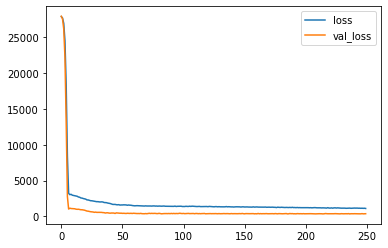

In [142]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

------------------------------
OVERALL RRMSE
0.8635826391715896
OVERALL RMSE
19.085712369831636


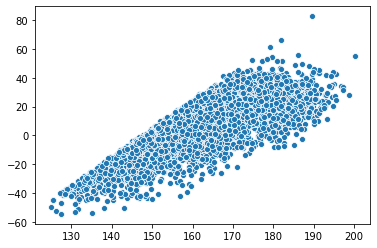

In [143]:
# X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y_hr), test_size=0.25, random_state=15)

res_nn = model.predict(X_test)
RRMSE_max_hr = 1 - r2_score(y_test, res_nn)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE_max_hr)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y_test, res_nn)))

y_res = list(chain.from_iterable(res_nn))

# BLAND-ALTMAN plot
sns.scatterplot(x=((y_test + y_res) / 2), y=(y_test - y_res))

### SVM

In [85]:
X = X_all[X_hr_10]

X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y_hr), test_size=0.25, random_state=69)

X.head()

,max_rer,ageattest,height inch->cm,resting_hr,resting_sbp,peak_sbp,weight Ib->kg,resting_dbp,ve_btbs,BMI
0,0.34,0.322812,0.666821,0.318182,0.381818,0.449891,0.268406,0.525000,1.000000,0.218599
1,0.22,0.509326,0.254439,0.456250,0.380273,0.456522,0.291403,0.484375,0.453992,0.455874
2,0.36,0.609756,0.208275,0.456250,0.380273,0.347826,0.216546,0.484375,0.457786,0.393582
3,0.16,0.236729,0.450980,0.704545,0.380273,0.449891,0.183053,0.484375,0.403765,0.227900
4,0.36,0.552367,0.647059,0.409091,0.345455,0.449891,0.237614,0.425000,0.352938,0.198994


In [86]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [87]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [88]:
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.233, total=   5.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.237, total=   5.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.230, total=   5.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.213, total=   5.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.218, total=   5.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.102, total=   5.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.107, total=   6.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.103, total=   6.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.096, total=   6.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.228, total=   5.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.228, total=   5.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.223, total=   5.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.205, total=   6.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.215, total=   6.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.105, total=   6.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.109, total=   7.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.213, total=   5.9s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.237, total=   6.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.228, total=   5.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.227, total=   6.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.223, total=   6.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.204, total=   6.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.215, total=   6.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 14.2min finished


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [89]:
# best = {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

0.6653341736061302
0.6626926514205398
0.6848483139043748
0.6663261823818182
0.6900373053630702
0.6906372630044179
0.6784966310079957
0.7076072610574545
0.6687959780609715
0.682722818506634
------------------------------
OVERALL RRMSE
0.6794269882658628
OVERALL RMSE
16.79442033707449


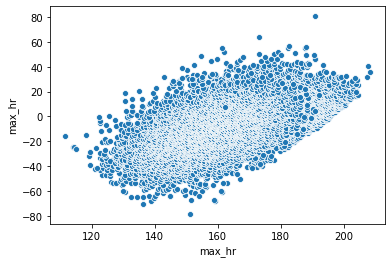

In [90]:
svr = SVR(C=10.0, kernel='rbf', gamma=1.0)

res_svm = test_cv(svr, X, y_hr, k=10)
RRMSE_max_hr = 1 - r2_score(y_hr, res_svm)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE_max_hr)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y_hr, res_svm)))

y_res = list(chain.from_iterable(res_svm))

# BLAND-ALTMAN plot
sns.scatterplot(x=((y_hr + y_res) / 2), y=(y_hr - y_res))